In [1]:
import pandas as pd

In [2]:
#  From $ man perf stat
#  The fields are in this order:
#        ·   optional usec time stamp in fractions of second (with -I xxx)
#        ·   optional CPU, core, or socket identifier
#        ·   optional number of logical CPUs aggregated
#        ·   counter value
#        ·   unit of the counter value or empty
#        ·   event name
#        ·   run time of counter
#        ·   percentage of measurement time the counter was running
#        ·   optional variance if multiple values are collected with -r
#        ·   optional metric value
#        ·   optional unit of metric
STATS = ["counter_value", "counter_value_unit", "event_name", "counter_value_variance", "counter_run_time", "counter_run_time_porcentage", "metric_value","metric_name"]

In [3]:
from datetime import datetime

In [4]:
import re

In [5]:
from pathlib import Path

In [6]:
dir = Path('../solutions/original/log/boyerito')

In [7]:
def parse_stats(filepath):
    df = pd.read_csv(filepath, names=STATS, skiprows=1)
    filename = filepath.name
    parts = filename.split('-')
    df['run_start_time'] = datetime.strptime(filename[:16],'%Y-%m-%dT%H:%M')
    df['cc'] = parts[5]
    dni = parts.index('dn')
    df['n'] = int(parts[dni+1])
    df['cldflags'] = '-'.join(parts[6:dni])
    return df

In [8]:
data = []
for child in dir.iterdir(): 
    if child.match('*.csv'):
        data.append(parse_stats(child))

In [9]:
df = pd.concat(data)

In [10]:
gflops_256 = df[(df.metric_name == 'GFLOPs') & (df.n == 256)]
gflops_256

,counter_value,counter_value_unit,event_name,counter_value_variance,counter_run_time,counter_run_time_porcentage,metric_value,metric_name,run_start_time,cc,n,cldflags
3,18,NaN,fp_arith_inst_retired.scalar_single,12.73%,4058525480,66.67,1.6,GFLOPs,2021-04-19 15:30:00,icc,256,ofast-march-native-lm
3,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4277644584,66.63,1.6,GFLOPs,2021-04-19 15:26:00,gcc_5,256,o4-march-native-flto-lm
3,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,10768618054,66.67,0.7,GFLOPs,2021-04-19 14:41:00,gcc_5,256,o0-lm
3,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4070046047,66.65,1.6,GFLOPs,2021-04-19 15:07:00,gcc_5,256,o3-march-native-lm
3,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4336969681,66.66,1.3,GFLOPs,2021-04-19 15:10:00,clang_12,256,o4-march-native-lm
3,19,NaN,fp_arith_inst_retired.scalar_single,8.04%,4266403347,66.65,1.5,GFLOPs,2021-04-19 15:07:00,icc,256,o3-march-native-lm
3,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4050522550,66.61,1.3,GFLOPs,2021-04-19 15:07:00,clang_6_0,256,o3-march-native-lm
3,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4030670631,66.60,1.4,GFLOPs,2021-04-19 15:26:00,clang_6_0,256,o4-march-native-flto-lm
3,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4188996201,66.65,1.3,GFLOPs,2021-04-19 15:23:00,clang_12,256,o4-march-native-ffast-math-lm
3,14,NaN,fp_arith_inst_retired.scalar_single,21.26%,4116249892,66.63,1.6,GFLOPs,2021-04-19 15:26:00,icc,256,o4-march-native-flto-lm


In [11]:
gflops_256[["cc", "cldflags", "metric_value"]].sort_values("metric_value", ascending = False)

,cc,cldflags,metric_value
3,nvc,o4-march-native-lm,2.8
3,nvc,o4-march-native-mipa-fast,2.7
3,nvc,o4-march-native-mipa-fast-inline,2.7
3,nvc,o4-march-native-lm,2.7
3,gcc_10,o4-march-native-floop-block-lm,1.7
3,gcc_10,o4-march-native-lm,1.7
3,icc,ofast-march-native-lm,1.6
3,icc,o4-march-native-funroll-loops-lm,1.6
3,icc,o4-march-native-floop-block-lm,1.6
3,gcc_5,o4-march-native-funroll-loops-lm,1.6


In [12]:
gflops_256[gflops_256.cldflags == "o4-march-native-lm"][["metric_value", "cc"]]

,metric_value,cc
3,1.3,clang_12
3,1.6,gcc_5
3,2.7,nvc
3,1.3,clang_6_0
3,2.8,nvc
3,1.6,icc
3,1.7,gcc_10


In [13]:
gflops_scaling = df[(df.metric_name == 'GFLOPs') & (df.cc == 'nvc') & (df.cldflags == 'o4-march-native-lm')]
gflops_scaling['GFLOPs_div_n'] = gflops_scaling["metric_value"] / gflops_scaling["n"]
gflops_scaling = gflops_scaling.sort_values("n", ascending = False)
gflops_scaling[["metric_value", "cc", "n", 'GFLOPs_div_n']].sort_values("n", ascending = False)

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,metric_value,cc,n,GFLOPs_div_n
3,4.6,nvc,2048,0.002246
3,5.0,nvc,1024,0.004883
3,4.3,nvc,512,0.008398
3,2.7,nvc,256,0.010547
3,2.8,nvc,256,0.010937
3,2.4,nvc,64,0.037500
3,1.9,nvc,16,0.118750


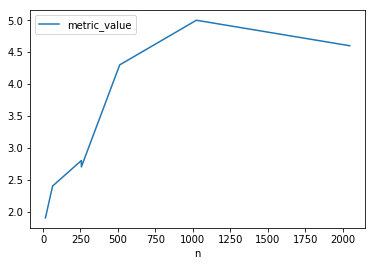

In [14]:
%matplotlib inline
gflops_scaling.plot("n","metric_value");